In [1]:
import pandas as pd
import re 
def remove_non_numeric(s):
    return re.sub(r'\D', '', s)

# Load the dataset
df = pd.read_csv('/Users/eric/Downloads/Normalized_counts-nofilter-PAX_IS_WGCNA_Oct_2021genesrows.csv')

# Clean column headers
df.columns = [remove_non_numeric(col) for col in df.columns]

# Clean row headers if they are not numeric (assuming first column is used for row headers)
if not pd.api.types.is_numeric_dtype(df.iloc[:, 0]):
    df.iloc[:, 0] = df.iloc[:, 0].apply(remove_non_numeric)

    # Set the cleaned first column as the DataFrame index
    df.set_index(df.columns[0], inplace=True)

# Display the cleaned DataFrame
df.head()


,1000,1015,1022,1037,1039,1055,1058,1070,1080,1082,...,867,869,870,874,880,884,949,951,975,999
,,,,,,,,,,,,,,,,,,,,,
0000000000314,0.000000,0.404399,6.076860,0.000000,3.303590,0.498558,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.530350,0.000000,0.000000,0.982491,0.000000,0.794619,0.000000,0.000000
000000000055,0.758372,0.000000,0.617875,0.078683,0.271302,0.000000,0.576356,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.251739,0.240412,0.000000,0.000000,0.000000
0000000041912,5.360130,7.477550,4.327760,3.707520,2.764030,5.476930,5.924350,5.229500,6.104330,2.960050,...,4.028080,5.50978,6.010790,4.445000,4.860000,5.236300,2.347270,2.304770,4.444110,14.573300
0000000045713,6.739990,4.960450,5.846280,6.859990,4.217280,6.532710,9.014860,5.982350,5.492280,3.984740,...,4.323470,6.29369,7.165110,4.269550,7.657680,4.650440,2.274760,5.478690,5.628960,7.354530
0000000046016,0.500276,0.020343,0.718142,0.148300,0.464470,0.361150,0.472023,0.420424,0.304137,0.249317,...,0.290262,0.40125,0.416283,0.366986,0.613336,0.296544,0.465709,0.367161,0.380019,0.926252


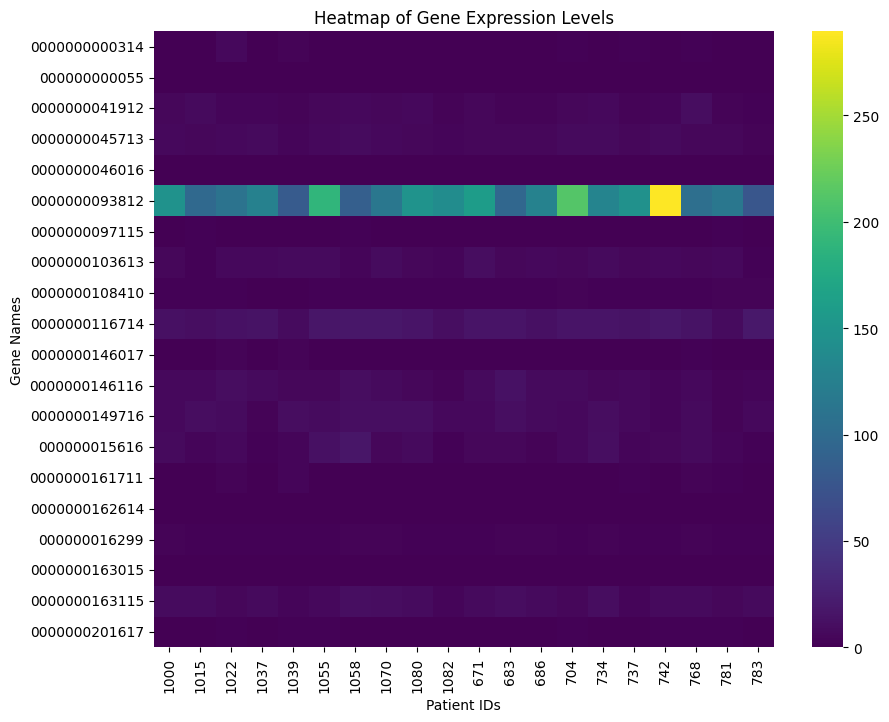

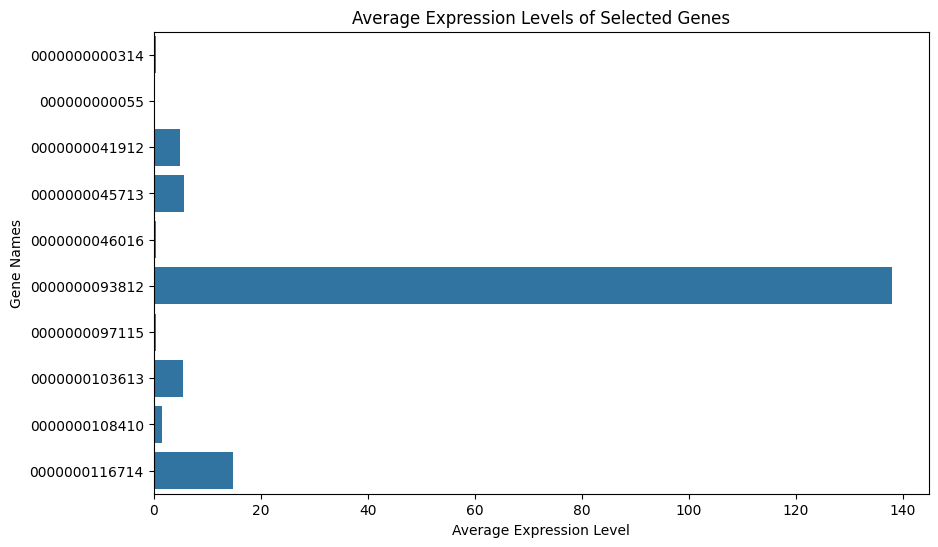

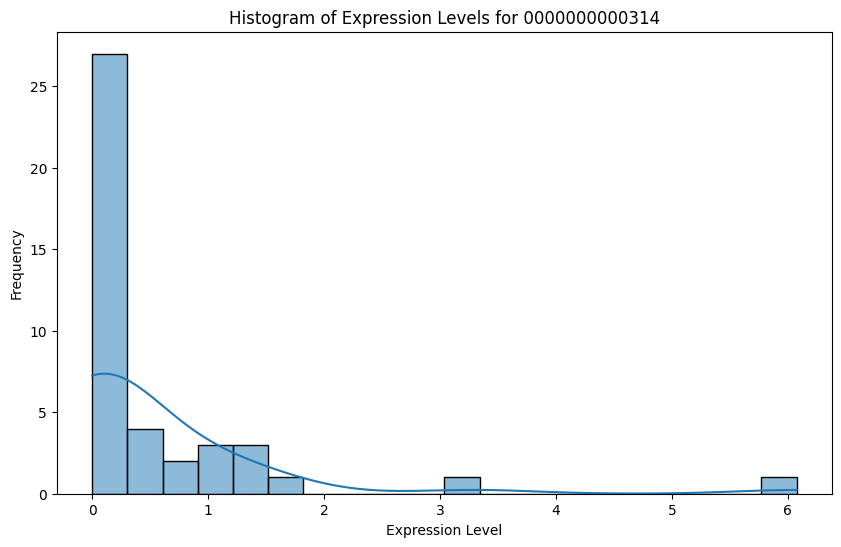

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Heatmap of the first 20 genes across the first 20 patients
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:20, :20], cmap="viridis")
plt.title('Heatmap of Gene Expression Levels')
plt.xlabel('Patient IDs')
plt.ylabel('Gene Names')
plt.show()

# Bar plot of the average expression levels of the first 10 genes
plt.figure(figsize=(10, 6))
df_mean = df.iloc[:10, :].mean(axis=1)
sns.barplot(x=df_mean.values, y=df_mean.index)
plt.title('Average Expression Levels of Selected Genes')
plt.xlabel('Average Expression Level')
plt.ylabel('Gene Names')
plt.show()

# Histogram of the expression levels for the first gene across all patients
plt.figure(figsize=(10, 6))
sns.histplot(df.iloc[0, :], bins=20, kde=True)
plt.title(f'Histogram of Expression Levels for {df.index[0]}')
plt.xlabel('Expression Level')
plt.ylabel('Frequency')
plt.show()


In [10]:
import pandas as pd
import numpy as np

# Assuming 'df' is a DataFrame where rows are genes and columns are experimental conditions
# Example: df = pd.read_csv('gene_expression_matrix.csv')

# Calculate the Pearson Correlation Coefficient matrix
pcc_matrix = df.corr(method='pearson')
pcc_matrix.head()


,1000,1015,1022,1037,1039,1055,1058,1070,1080,1082,...,867,869,870,874,880,884,949,951,975,999
1000,1.000000,0.962944,0.873404,0.920062,0.940504,0.921870,0.961988,0.977751,0.930855,0.902181,...,0.970120,0.953224,0.947417,0.941884,0.967529,0.970885,0.888240,0.945870,0.922765,0.940616
1015,0.962944,1.000000,0.819289,0.940715,0.926019,0.917227,0.934795,0.966247,0.905939,0.931662,...,0.986241,0.978819,0.969229,0.898672,0.947949,0.926713,0.905323,0.918005,0.903413,0.888981
1022,0.873404,0.819289,1.000000,0.825838,0.906682,0.841500,0.856592,0.849698,0.878266,0.805243,...,0.837668,0.835171,0.872073,0.839924,0.868109,0.881334,0.761487,0.821174,0.907173,0.821970
1037,0.920062,0.940715,0.825838,1.000000,0.945354,0.948445,0.893605,0.924665,0.935821,0.981151,...,0.958678,0.957830,0.942626,0.851661,0.946152,0.858774,0.980919,0.885941,0.953229,0.775263
1039,0.940504,0.926019,0.906682,0.945354,1.000000,0.964164,0.941579,0.936741,0.949919,0.926447,...,0.942057,0.927482,0.952686,0.850160,0.952585,0.904239,0.920112,0.857588,0.945540,0.844010


In [4]:
# Define a threshold for PCC values
threshold = 0.8  # This is an arbitrary value; adjust based on your analysis

# Identify gene pairs that exceed the correlation threshold
edges = np.where(pcc_matrix > threshold)

# Create a list of edges
edge_list = list(zip(edges[0], edges[1]))

# Remove self-loops
edge_list = [pair for pair in edge_list if pair[0] != pair[1]]


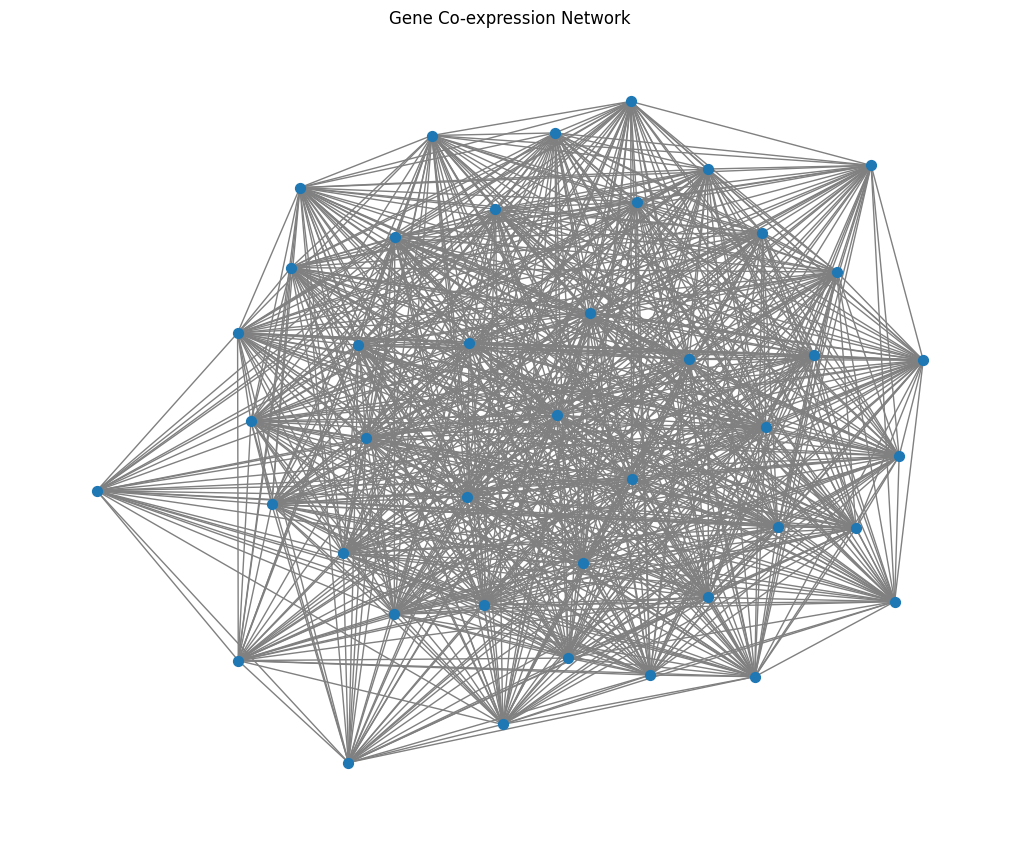

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the edge list
G = nx.Graph()
G.add_edges_from(edge_list)

# Draw the network
plt.figure(figsize=(10, 8))
nx.draw(G, node_size=50, edge_color='gray')
plt.title('Gene Co-expression Network')
plt.show()


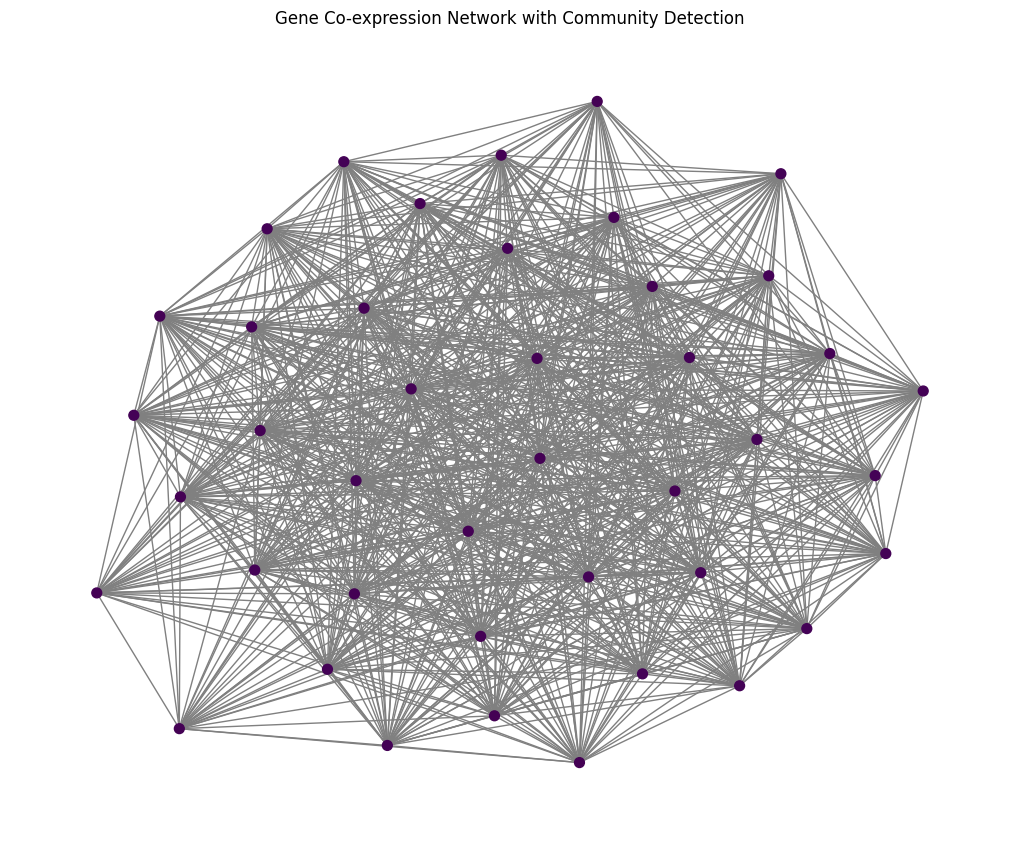

In [6]:
import community as community_louvain
import networkx as nx

# Assuming you have a NetworkX graph called 'G'

# Compute the best partition using the Louvain algorithm
partition = community_louvain.best_partition(G)

# 'partition' is a dictionary where the keys are the nodes and the values are the community ids


# Compute the best partition
partition = community_louvain.best_partition(G)

# Draw the network with community assignments
plt.figure(figsize=(10, 8))
cmap = plt.get_cmap('viridis')
nx.draw(G, node_color=[cmap(partition[node]) for node in G.nodes()], node_size=50, edge_color='gray')
plt.title('Gene Co-expression Network with Community Detection')
plt.show()


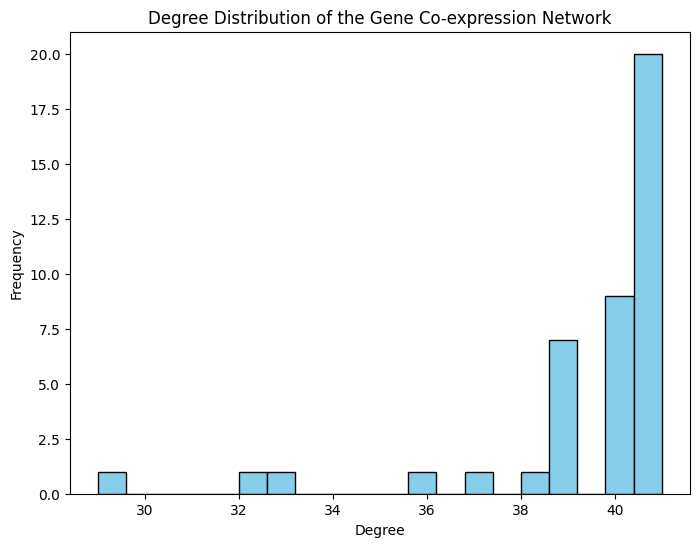

In [7]:
degrees = [G.degree(n) for n in G.nodes()]

plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=20, color='skyblue', edgecolor='black')
plt.title('Degree Distribution of the Gene Co-expression Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()


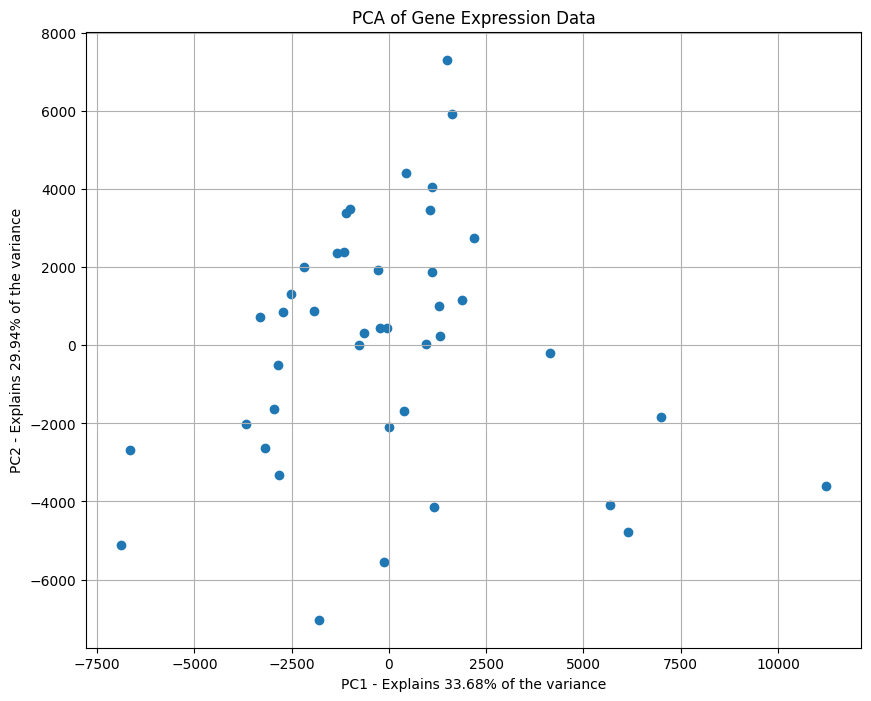

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with genes as rows and samples as columns
# Transpose 'df' since PCA in sklearn expects features as columns and samples as rows
df_transposed = df.T

# Initialize PCA, you can specify the number of components you want to keep
pca = PCA(n_components=2)  # For 2D visualization, we use 2 components

# Fit PCA on the dataset
pca_result = pca.fit_transform(df_transposed)

# pca_result contains the coordinates of your samples in the new space defined by the principal components

# Plotting the results
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1])  # Scatter plot of the first two principal components
plt.title('PCA of Gene Expression Data')
plt.xlabel('PC1 - Explains {:.2f}% of the variance'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 - Explains {:.2f}% of the variance'.format(pca.explained_variance_ratio_[1]*100))
plt.grid(True)
plt.show()


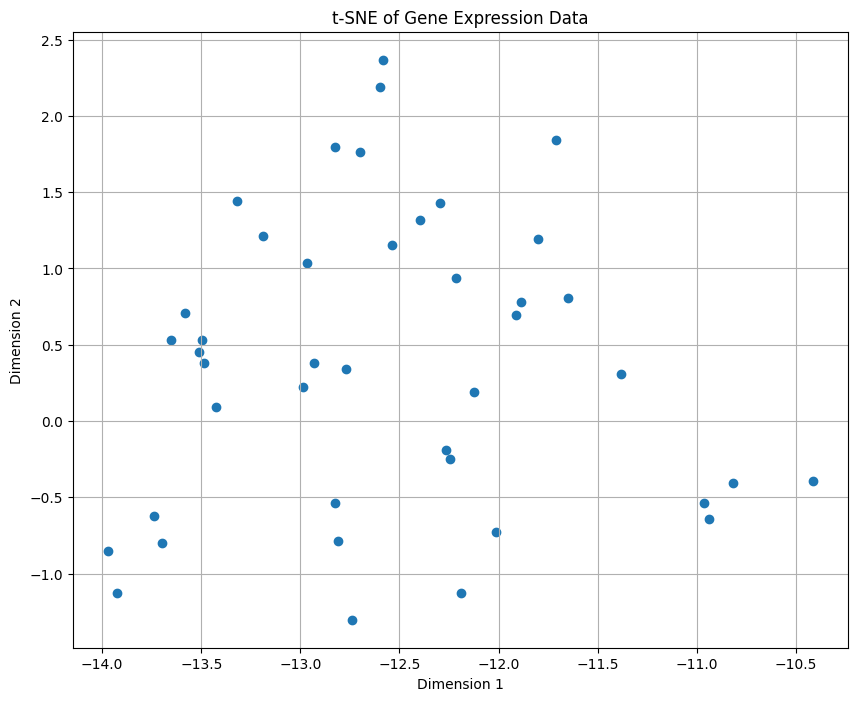

In [9]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)  # These parameters can be adjusted

# Apply t-SNE to the data (transpose if necessary to have samples as rows)
tsne_result = tsne.fit_transform(df.T)  # df.T if genes are rows and samples are columns

# Plotting the results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title('t-SNE of Gene Expression Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming 'df' is your DataFrame with the last column being 'stroke_label'

X = df.iloc[:, :-1]  # Features (gene expressions)
y = df.iloc[:, -1]   # Labels (stroke diagnosis)

# Convert 'y' to integer if it's not already
y = y.astype(int)

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 51.42%
Confusion Matrix:
[[2018   42   12 ...    0    0    0]
 [ 136  131   43 ...    0    0    0]
 [  51   55   63 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


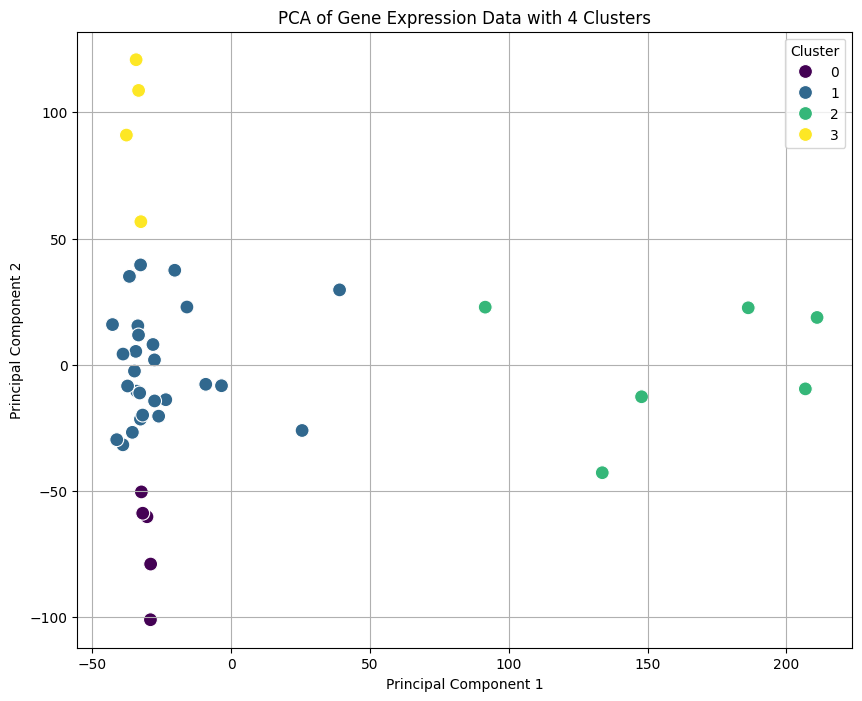

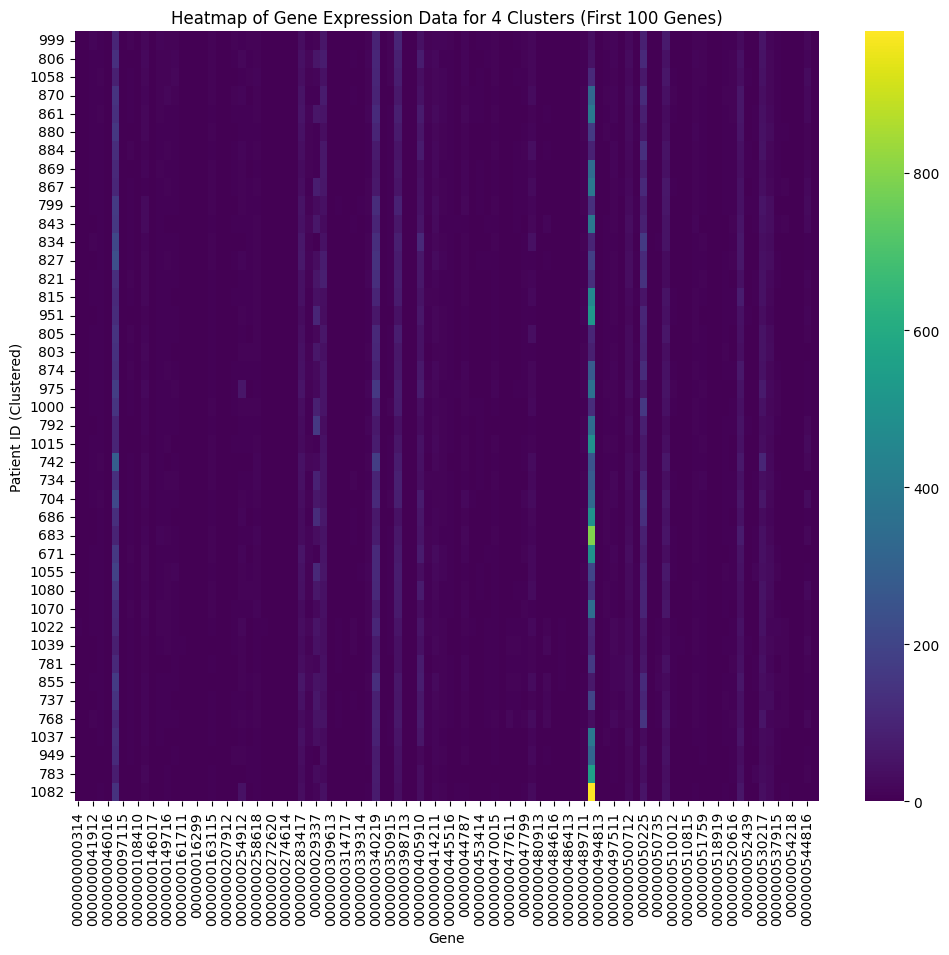

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


data_transposed = df.transpose()

# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_transposed)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_normalized)
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'], index=data_transposed.index)

# K-means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_df)
pca_df['Cluster'] = clusters

# PCA plot with clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis', legend='full', s=100)
plt.title(f'PCA of Gene Expression Data with {n_clusters} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

# Heatmap of gene expression data with samples ordered by cluster
data_transposed['Cluster'] = clusters
sorted_data = data_transposed.sort_values(by='Cluster').drop('Cluster', axis=1)
plt.figure(figsize=(12, 10))
sns.heatmap(sorted_data.iloc[:, :100], cmap='viridis')  # Visualizing only the first 100 genes for clarity
plt.title(f'Heatmap of Gene Expression Data for {n_clusters} Clusters (First 100 Genes)')
plt.xlabel('Gene')
plt.ylabel('Patient ID (Clustered)')
plt.show()


Analysis:
PCA and Clustering: The PCA scatter plot reveals that the patient samples form distinct groups when projected onto the first two principal components, suggesting inherent patterns in the gene expression data. The K-means clustering further delineates these groups, indicating potential subtypes within the patient population based on their gene expression profiles. The presence of distinct clusters could imply differences in underlying biological processes or disease states among the patients.

Heatmap Visualization: The heatmap shows the expression levels of the first 100 genes across the clustered patient samples. The color gradients represent varying levels of gene expression. This visualization allows us to observe specific genes that are highly expressed or downregulated within each cluster, which might be key drivers or markers of the biological differences among the clusters. For example, if a particular cluster shows consistent upregulation of certain genes, those genes might be associated with a specific disease phenotype or response to treatment.

These insights could be valuable for further biological or clinical investigations, such as identifying biomarkers for disease subtypes or understanding the molecular mechanisms underlying different patient responses to treatments.